Saving smiles_affinity.csv to smiles_affinity (1).csv
RMSE: 1.253 kcal/mol
R² Score: 0.555


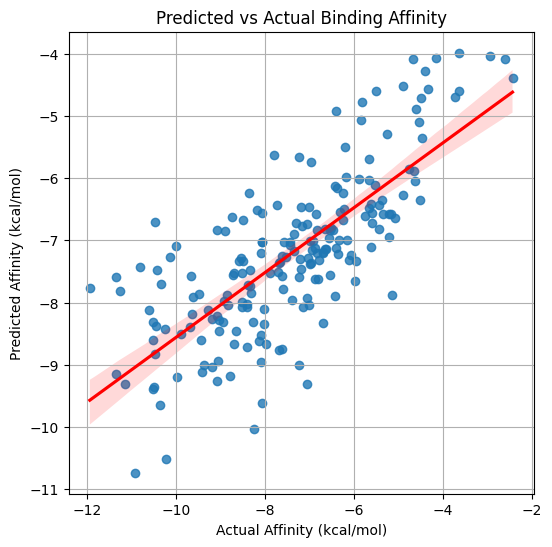

CCN(CC)C(=O)C[N+](CC)(CC)CC(=O)Nc1c(C)cc(C)cc1C → -7.645 kcal/mol
O=C1NC(=O)C2(CCCCC2)C(=O)N1 → -6.726 kcal/mol
Clc1ccc2oc3c(Cl)c(Cl)ccc3c2c1 → -8.474 kcal/mol
O[C@@H]1C=Cc2cc3ccc4cccc5ccc(c2[C@H]1O)c3c45 → -8.921 kcal/mol


In [ ]:
from google.colab import files
uploaded = files.upload()

# Instalasi pustaka
!pip install rdkit-pypi scikit-learn pandas matplotlib seaborn

# Import pustaka
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Filter SMILES yang valid
def is_valid_smiles(smiles):
    return Chem.MolFromSmiles(smiles) is not None

df = df[df['SMILES'].apply(is_valid_smiles)]
df = df.dropna(subset=['Affinity_kcal'])

# Konversi SMILES ke fingerprint
def smiles_to_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))

X = np.vstack([smiles_to_fp(smi) for smi in df['SMILES']])
y = df['Affinity_kcal'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model tanpa tuning (standar)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f} kcal/mol")
print(f"R² Score: {r2:.3f}")

# Visualisasi hasil prediksi
plt.figure(figsize=(6, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Affinity (kcal/mol)")
plt.ylabel("Predicted Affinity (kcal/mol)")
plt.title("Predicted vs Actual Binding Affinity")
plt.grid(True)
plt.show()

# Prediksi batch molekul baru
smiles_list = [
    "CCN(CC)C(=O)C[N+](CC)(CC)CC(=O)Nc1c(C)cc(C)cc1C",
    "O=C1NC(=O)C2(CCCCC2)C(=O)N1",
    "Clc1ccc2oc3c(Cl)c(Cl)ccc3c2c1",
    "O[C@@H]1C=Cc2cc3ccc4cccc5ccc(c2[C@H]1O)c3c45"
]
fp_list = np.vstack([smiles_to_fp(smi) for smi in smiles_list])
prediksi_batch = model.predict(fp_list)

for smi, pred in zip(smiles_list, prediksi_batch):
    print(f"{smi} → {pred:.3f} kcal/mol")


In [ ]:
import joblib
joblib.dump(model, 'model_cox2.pkl')


['model_cox2.pkl']